In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot
import os
import json

import seaborn as sns
import pandas as pd


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [3]:
samples_path = "../OUTPUT/sample_sizes"
mcms_fname = "MCMs.json"
counts_fname = "Counts.json"

with open(os.path.join(samples_path,str(5421), mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(5421), counts_fname), "r") as f:
        C = json.load(f)

In [4]:
mcm_index = 3

In [5]:
n_variables = 121
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"

# # for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
# all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM,3,n_variables, data_path,data_filename_format)
# np.save("../OUTPUT/sample_sizes/5421/all_C_icc_3.npy", all_C_icc_3)



In [6]:

# all_C_icc_5 = np.load("../OUTPUT/sample_sizes/5421/all_C_icc_5.npy")
all_C_icc_3 = np.load("../OUTPUT/sample_sizes/5421/all_C_icc_3.npy")


In [7]:
mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
mcm5_comms_map = myplot.generate_icc_comms_map(all_MCM[5])

In [8]:
# Skip community structure calculation. #TODO This cell is not trash.

# scale = 2
# fig, axs  = plt.subplots(2,5,figsize=(12*scale,5*scale))
# axs = axs.flatten()
# for i, ax in enumerate(axs): 
#     comms = myplot.generate_icc_comms_map(all_MCM[i])
#     myplot.plot_communities(ax, comms, myplot.int_to_letters(comms),f"MCM {i}")
# # myplot.plot_communities(axs[1],mcm5_comms_map,"MCM 5")

# plt.tight_layout()
# plt.savefig("../figures/paper_comms.png",dpi=300, bbox_inches="tight")
# plt.close()

--------------------------

Scatter plot in how % correct vote for iccs (points) for seeing a 3 vs a 5

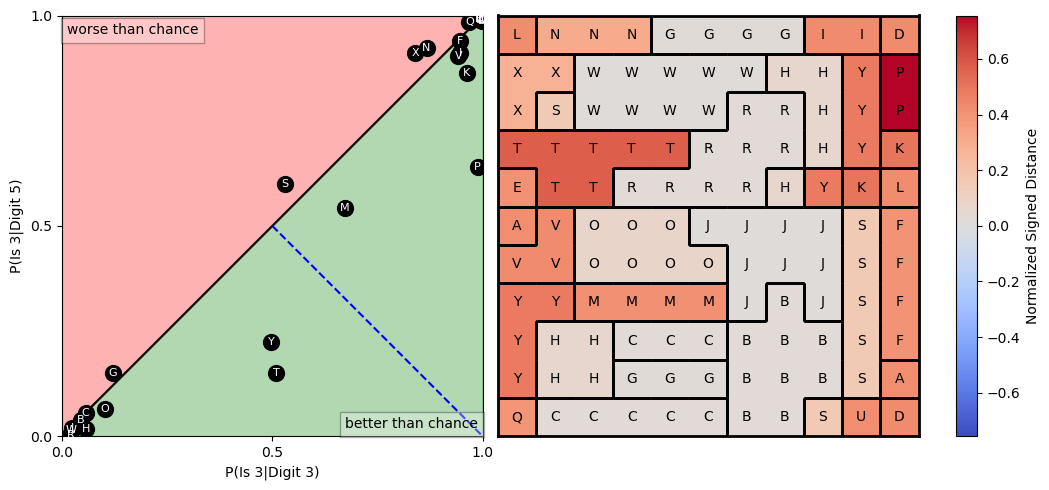

In [9]:
cat_a = 3
cat_b = 5
mcm_idx = 3

all_prob = all_C_icc_3/all_C_icc_3.shape[1] # for MCM 0
avg_prob = all_prob.mean(axis=1)

scale = 1
fig, axs  = plt.subplots(1,2,figsize=(12*scale,5*scale))
axs = axs.flatten()
axs[0].set_aspect('equal')
axs[0].set_xticks([0, 0.5, 1])
axs[0].set_yticks([0, 0.5, 1])
# axs[0].grid(True, linestyle='--', alpha=0.6)

# decision space
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
axs[0].fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)


axs[0].plot([0.5, 1], [0.5, 0], color='blue', linestyle='--')


# plots
# axs[0].scatter(avg_prob[:, cat_a], avg_prob.max(axis=1), color="red", marker=".", label="worst digit") # extreme performnce
# axs[0].scatter(avg_prob[:, cat_a], avg_prob.min(axis=1), color="green", marker=".", label="best digit")



axs[0].scatter(avg_prob[:, cat_a], avg_prob[:, cat_b], color="black", marker="o", label=cat_b,s=130)


for i, (x, y) in enumerate(zip(avg_prob[:, cat_a], avg_prob[:, cat_b])):
    axs[0].text(x, y, myplot.int_to_letters(i), color="white", ha="center", va="center",fontsize=8)


# other stuff
axs[0].set_xlabel(f'P(Is {mcm_idx}|Digit {cat_a})')
axs[0].set_ylabel(f'P(Is {mcm_idx}|Digit {cat_b})')
# axs[0].set_title('Scatter Plot of state likelihoods for iccs in MCM 3')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[0].text(.012, .982, "worse than chance", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))
axs[0].text(.989, .012, "better than chance", ha='right', va='bottom', bbox=dict(facecolor='white',alpha=.3))
# axs[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
# axs[0].legend(bbox_to_anchor=(.5, -0.2), loc='center', ncol=2)




# partition map for distances to decision bounary
plt.subplots_adjust(wspace=-.7)
x_coords, y_coords = zip(*[(x, y) for x, y in zip(avg_prob[:, cat_a], avg_prob[:, cat_b],)])
distances = np.array(x_coords) - np.array(y_coords) / np.sqrt(2) # signed distance
x0, y0 = 0, 1
max_dist = np.abs(x0 - y0) / np.sqrt(2)

axs[1].set_aspect('equal')
comms3 = myplot.generate_icc_comms_map(all_MCM[3])
dist_map = distances[comms3]/max_dist
im = myplot.partition_map(plt.gca(), dist_map,myplot.int_to_letters(comms3),myplot.find_borders(comms3), cbar=False)
plt.colorbar(im, ax=axs[1]).set_label('Normalized Signed Distance')
# plt.title("Normalized signed distance to decision boundary (3v5).", fontsize=11)
plt.tight_layout()  # Adjust subplot layout
plt.savefig("../figures/paper_decib_and_map.png")
# CLelia
# upper right pixels are outside of the image, most black. As we go down diagnaolly get more center. Lower lit, larger.
# remove color points
# 3 has been seen, 5 has not been seen -> 5 is test data, 3 is train data


# digt 3 test vs. train in axis. Can see how much bias there is from smoothening. Appendix. WHy choose alhs.

Maybe instead of distance to decision boundary we use the ROC AUC score. Then there is also a balance for false positives and true negatives in a single score.

--------------------------

- 1x informative, 1x uninformative ICC
- Show PDF over samples for seeing 3 and seeing 5

In [10]:

letters = ["T","M","O","W"]
# letters = ["T","O"]

sel_icc = myplot.letters_to_int(letters)

pdfs = all_C_icc_3[sel_icc,:,3]/all_C_icc_3.shape[1]
df = pd.DataFrame(pdfs.T, columns=letters)



 Maybe have this as 3rd plot in scatter thing


/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


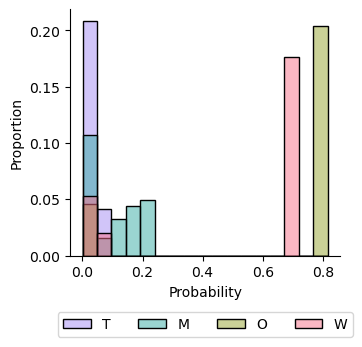

In [14]:
print("\n Maybe have this as 3rd plot in scatter thing")
# sns.histplot(df,stat="frequency")
sns.displot(df, height=3, aspect=1.2, palette="husl",legend=False, kind="hist",stat="proportion")
plt.xlabel("Probability")
# plt.title("Probability distribution of selected ICCs")
plt.legend(letters,bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)




In [15]:
from sklearn.metrics import roc_auc_score


pred = np.concatenate([inf_pdf[:,3] > .5,inf_pdf[:,0] <.5])
lab = np.repeat([1,0],5423)

auc_informative = roc_auc_score(lab, pred)
auc_informative # .5 = random guessing, 1 is perfect


NameError: name 'inf_pdf' is not defined

---------

maybe we could use distance to the decision boundary as an indication as to how got this icc votes
on y axis could have the average distriminatory performance over all digits

2. Could draw second diagonal. Only consider points in the green area. Points that line have no perference for positive or negative votes. Points below are more indicative of Not 3, whereas points above are more idicative of 3 but not so indicative of not 3.

Normalised distance to decision boundary comparing MCM 3 for seeing a 3 vs. seeing anything else (average)

 Notes on possible indicativity meaures
 - in the supreme court paper by Lee, they calculate the infuence of a supereme justice by calculating e.g., mutual inforamtion(this justice, vs court)
    Option 1: MI
    - MI(own vote, majority vote)
    - for us this would be pixel vote vs. average vote of MCM
        - would need threshold for probability maybe (.5 == majority vote equivalent)
    Option 2: Suseptability Gamma (defined in text)
    

    

- 121 x 121 matrix of membership of which pixels are part of which icc could be useful but only in the new basis, right now the communities are perfectly separated

Higher = more discriminatory 


Text(0.5, 1.0, 'Normalized signed distance to decision boundary (Seeing 3 vs Other) in procent.')

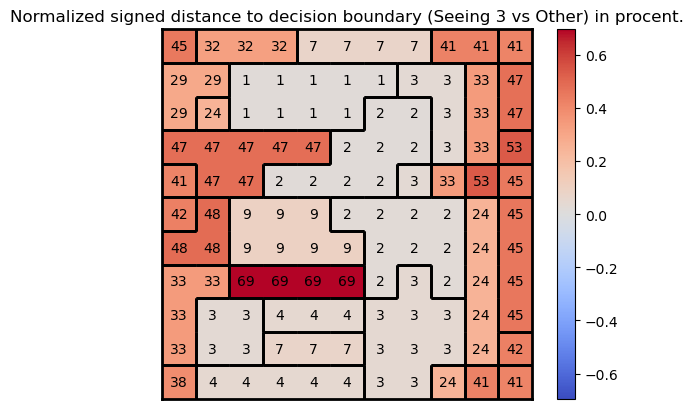

In [ ]:
x_coords, y_coords = zip(*[(x, y) for x, y in zip(avg_prob[:, cat_a], avg_prob.mean(axis=1))])
distances = np.array(x_coords) - np.array(y_coords) / np.sqrt(2)
x0, y0 = 0, 1
max_dist = np.abs(x0 - y0) / np.sqrt(2)


print("Higher = more discriminatory ")
comms3 = myplot.generate_icc_comms_map(all_MCM[3])
dist_map = distances[comms3]/max_dist
plt.figure()
myplot.partition_map(plt.gca(), dist_map,(dist_map*100).astype(int),myplot.find_borders(comms3))

plt.title("Normalized signed distance to decision boundary (Seeing 3 vs Other) in procent.")

In [ ]:
avg_prob = all_prob.mean(axis=1)
avg_prob.shape

(25, 10)

In [ ]:
raise KeyboardInterrupt


KeyboardInterrupt



--------------------